In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

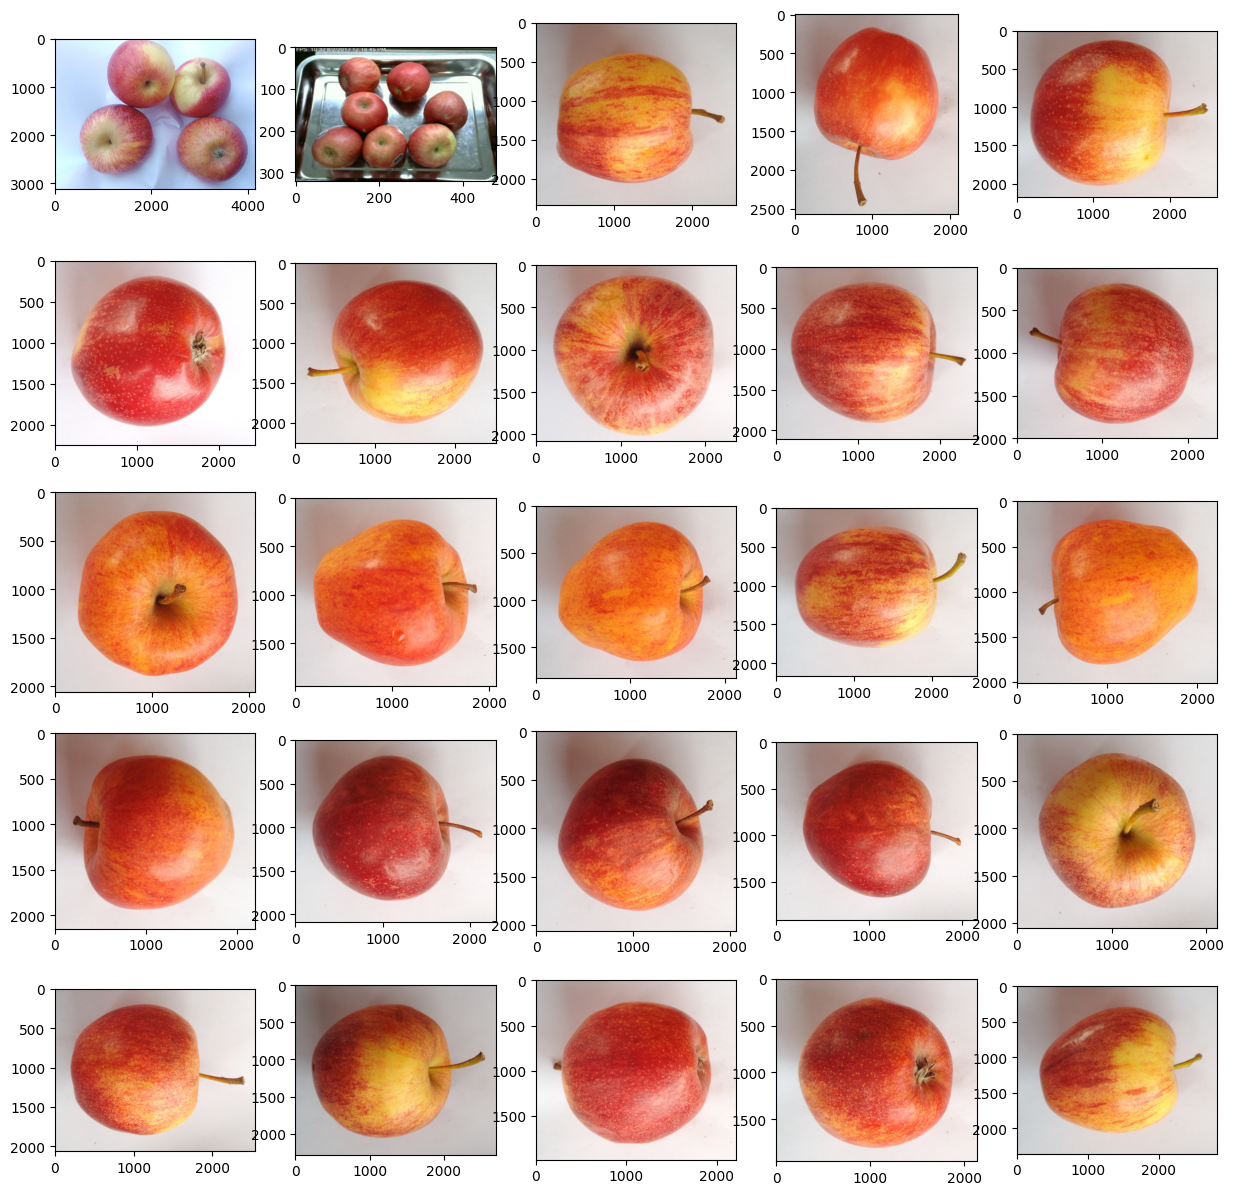

In [25]:
#Testing upload dataset correctly with apples
plt.figure(figsize=(15,15))
carpeta=r"C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset\Apple__Healthy"
imagenes=os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+nombreimg)
    plt.imshow(imagen)

ANALYSIS

In [19]:
#defining the dataset subfolder names
columns=['Apple__Healthy', 'Apple__Rotten']


In [20]:
# Algorithm to load images and label them in Color
images_healthy = []
images_rotten = []

for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size))  # Change image size
        if folder == 'Apple__Healthy':
            images_healthy.append(image)
        else:
            images_rotten.append(image)
    print(f'Loaded {len(images_healthy)} healthy and {len(images_rotten)} rotten images')



Loading -->  Apple__Healthy
Loaded 2438 healthy and 0 rotten images
Loading -->  Apple__Rotten
Loaded 2438 healthy and 2930 rotten images
Loading -->  Banana__Healthy
Loaded 2438 healthy and 4930 rotten images
Loading -->  Banana__Rotten
Loaded 2438 healthy and 7730 rotten images
Loading -->  Bellpepper__Healthy
Loaded 2438 healthy and 8341 rotten images
Loading -->  Bellpepper__Rotten
Loaded 2438 healthy and 8932 rotten images
Loading -->  Carrot__Healthy
Loaded 2438 healthy and 9552 rotten images
Loading -->  Carrot__Rotten
Loaded 2438 healthy and 10132 rotten images
Loading -->  Cucumber__Healthy
Loaded 2438 healthy and 10740 rotten images
Loading -->  Cucumber__Rotten
Loaded 2438 healthy and 11333 rotten images


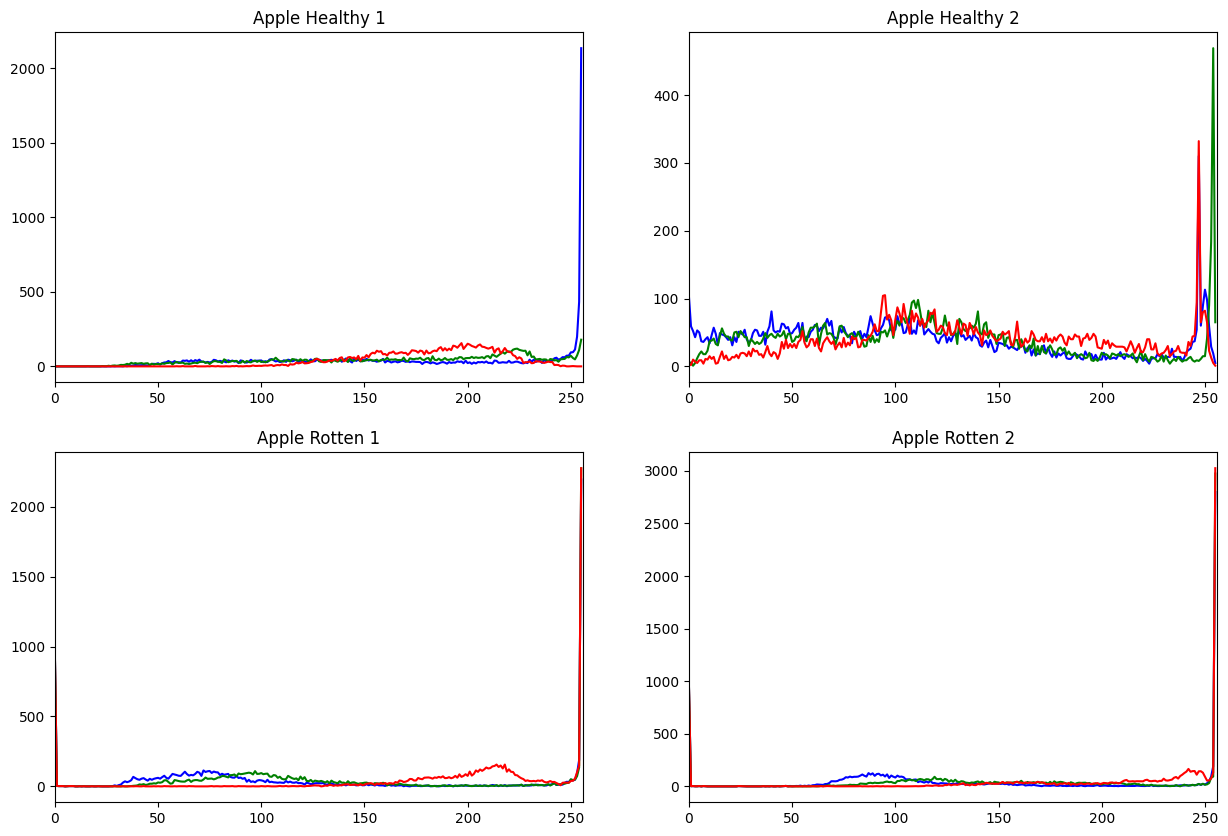

In [21]:
# Function to display color histogram
def show_histogram(image, title, ax):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(histr, color=col)
        ax.set_xlim([0, 256])
    ax.set_title(title)

# Create a figure for histograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Show histograms for healthy images
for i in range(2):
    show_histogram(images_healthy[i], 'Apple Healthy ' + str(i+1), axs[0, i])

# Show histograms for rotten images
for i in range(2):
    show_histogram(images_rotten[i], 'Apple Rotten ' + str(i+1), axs[1, i])

plt.show()

In [16]:
# Algorithm to load images and label them in grayscale

images_healthy_bn = []
images_rotten_bn = []

for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size))  # Change image size
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        if folder == 'Apple__Healthy':
            images_healthy_bn.append(image_gray)
        else:
            images_rotten_bn.append(image_gray)
    print(f'Loaded {len(images_healthy_bn)} healthy and {len(images_rotten_bn)} rotten images')



Loading -->  Apple__Healthy
Loaded 2438 healthy and 0 rotten images
Loading -->  Apple__Rotten
Loaded 2438 healthy and 2930 rotten images


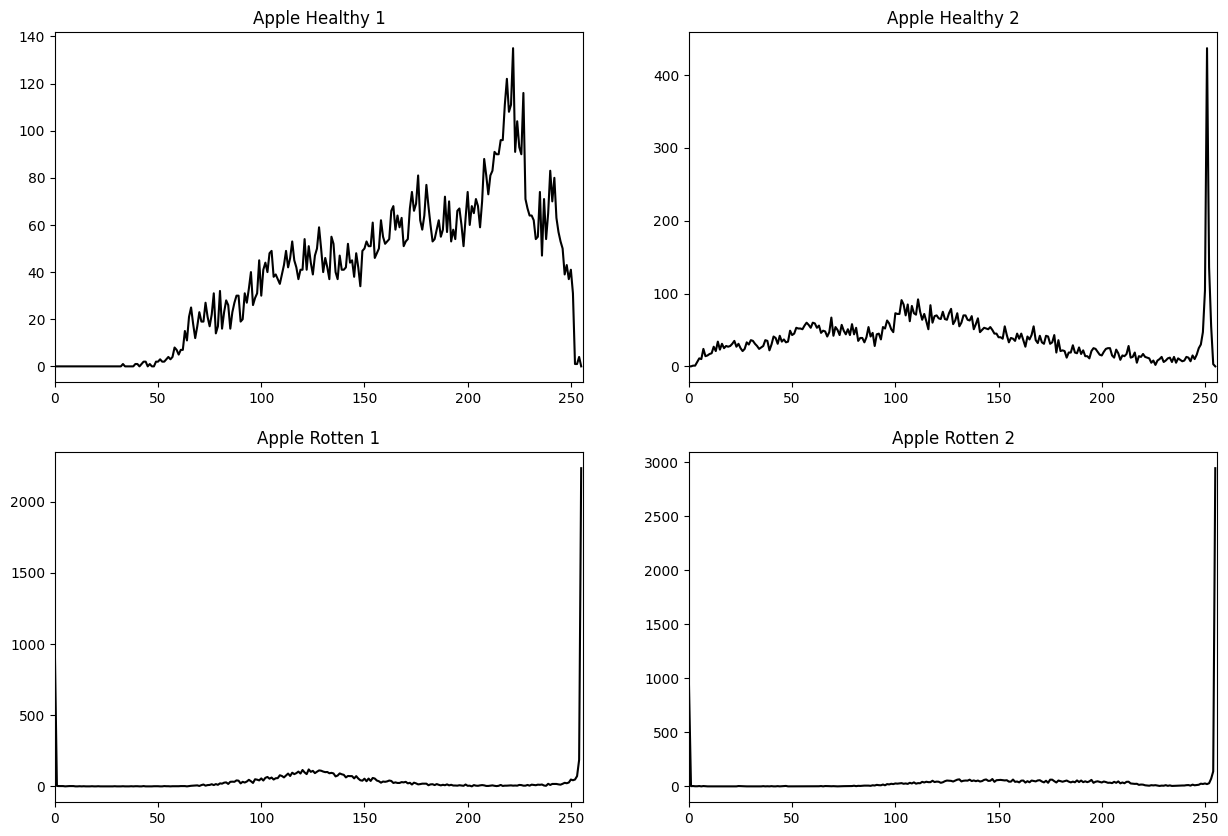

In [18]:
#FFunction to display the histogram of a grayscale image
def show_histogram(image, title, ax):
    histr = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.plot(histr, color='black')
    ax.set_xlim([0, 256])
    ax.set_title(title)

# Create a figure for histograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Show histograms for healthy images
for i in range(2):
    show_histogram(images_healthy_bn[i], 'Apple Healthy ' + str(i+1), axs[0, i])

# Show histograms for rotten images
for i in range(2):
    show_histogram(images_rotten_bn[i], 'Apple Rotten ' + str(i+1), axs[1, i])

plt.show()

In [33]:
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy',
           'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten',
           'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',
           'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy','Pomegranate__Rotten',
           'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']
img_size = 100

# Algorithm to upload images and label them
images = {column: [] for column in columns}

for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size))  # Change image size
        images[folder].append(image)
    print(f'Loaded {len(images[folder])} images for {folder}')

Loading -->  Apple__Healthy
Loaded 2438 images for Apple__Healthy
Loading -->  Apple__Rotten
Loaded 2930 images for Apple__Rotten
Loading -->  Banana__Healthy
Loaded 2000 images for Banana__Healthy
Loading -->  Banana__Rotten
Loaded 2800 images for Banana__Rotten
Loading -->  Bellpepper__Healthy
Loaded 611 images for Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
Loaded 591 images for Bellpepper__Rotten
Loading -->  Carrot__Healthy
Loaded 620 images for Carrot__Healthy
Loading -->  Carrot__Rotten
Loaded 580 images for Carrot__Rotten
Loading -->  Cucumber__Healthy
Loaded 608 images for Cucumber__Healthy
Loading -->  Cucumber__Rotten
Loaded 593 images for Cucumber__Rotten
Loading -->  Grape__Healthy
Loaded 200 images for Grape__Healthy
Loading -->  Grape__Rotten
Loaded 200 images for Grape__Rotten
Loading -->  Guava__Healthy
Loaded 200 images for Guava__Healthy
Loading -->  Guava__Rotten
Loaded 200 images for Guava__Rotten
Loading -->  Jujube__Healthy
Loaded 200 images for Jujube__H

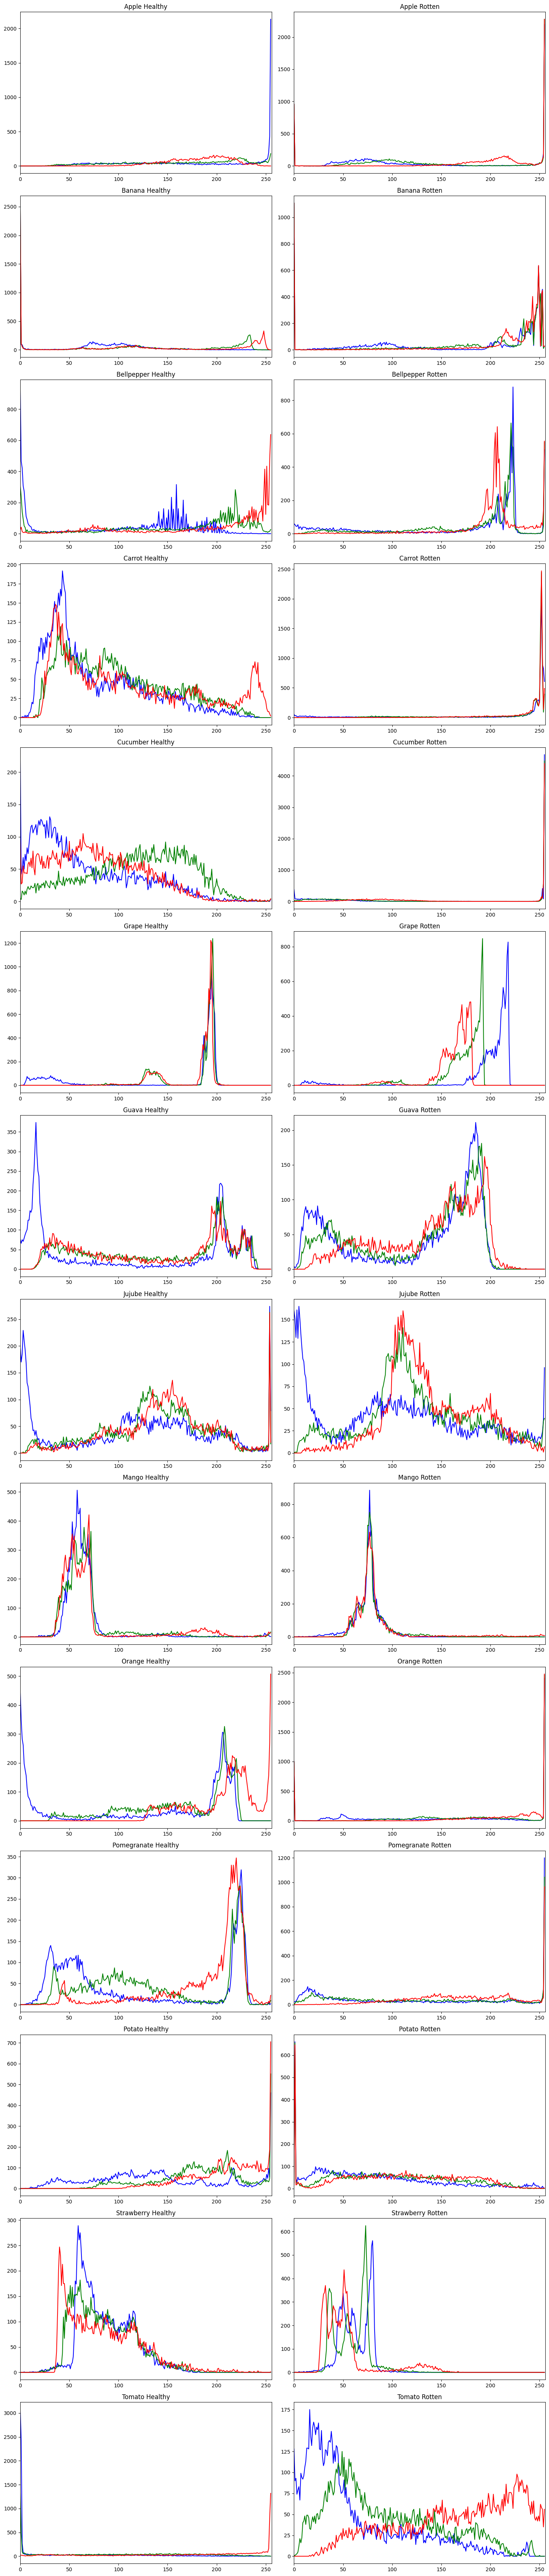

In [28]:
# Function to display color histogram
def show_histogram(image, title, ax):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        ax.plot(histr, color=col)
        ax.set_xlim([0, 256])
    ax.set_title(title)

# # Create a figure for histograms
fig, axs = plt.subplots(14, 2, figsize=(15, 70))

# Show histograms for fruits
row = 0
for fruit in ['Apple', 'Banana', 'Bellpepper', 'Carrot', 'Cucumber', 'Grape', 'Guava', 'Jujube', 'Mango', 'Orange', 'Pomegranate', 'Potato', 'Strawberry', 'Tomato']:
    show_histogram(images[fruit + '__Healthy'][0], fruit + ' Healthy', axs[row, 0])
    show_histogram(images[fruit + '__Rotten'][0], fruit + ' Rotten', axs[row, 1])
    row += 1

plt.tight_layout()
plt.show()



Number of Healthy images: 13787
Number of Rotten images: 15504


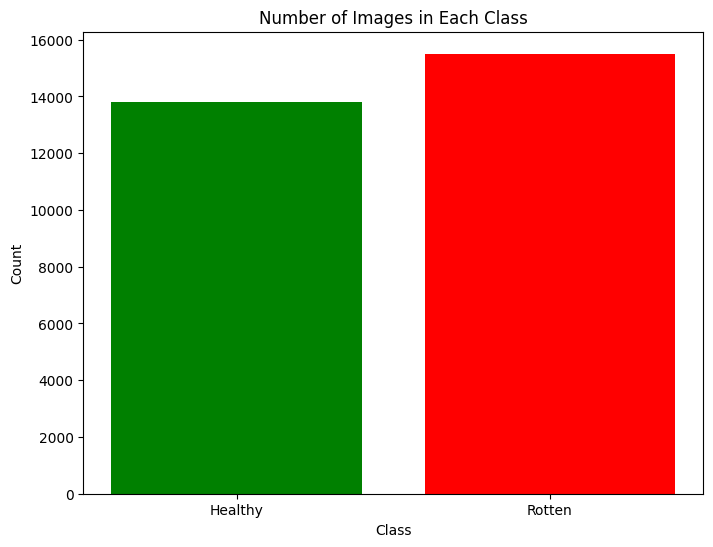

Healthy: 13787 images (47.07%)
Rotten: 15504 images (52.93%)
The classes are relatively balanced.


In [34]:
# Count the number of images in each class
counts = {'Healthy': 0, 'Rotten': 0}

for column in columns:
    if 'Healthy' in column:
        counts['Healthy'] += len(images[column])
    else:
        counts['Rotten'] += len(images[column])

# Print the counts
print(f"Number of Healthy images: {counts['Healthy']}")
print(f"Number of Rotten images: {counts['Rotten']}")

# Plot the counts
labels = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Number of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check for imbalance
total_images = sum(values)
for key in counts:
    percentage = (counts[key] / total_images) * 100
    print(f"{key}: {counts[key]} images ({percentage:.2f}%)")

if abs(counts['Healthy'] - counts['Rotten']) > (0.1 * total_images):
    print("There is a significant imbalance between the classes. Consider using techniques to handle unbalanced data.")
else:
    print("The classes are relatively balanced.")

In [30]:

# Algorithm to load images and convert them to grayscale
images_bw = {column: [] for column in columns}

for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\ladyt\OneDrive\archive (5)\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size))  # Resize the image
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        images_bw[folder].append(image_gray)
    print(f'Loaded {len(images_bw[folder])} images for {folder}')

Loading -->  Apple__Healthy
Loaded 2438 images for Apple__Healthy
Loading -->  Apple__Rotten
Loaded 2930 images for Apple__Rotten
Loading -->  Banana__Healthy
Loaded 2000 images for Banana__Healthy
Loading -->  Banana__Rotten
Loaded 2800 images for Banana__Rotten
Loading -->  Bellpepper__Healthy
Loaded 611 images for Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
Loaded 591 images for Bellpepper__Rotten
Loading -->  Carrot__Healthy
Loaded 620 images for Carrot__Healthy
Loading -->  Carrot__Rotten
Loaded 580 images for Carrot__Rotten
Loading -->  Cucumber__Healthy
Loaded 608 images for Cucumber__Healthy
Loading -->  Cucumber__Rotten
Loaded 593 images for Cucumber__Rotten
Loading -->  Grape__Healthy
Loaded 200 images for Grape__Healthy
Loading -->  Grape__Rotten
Loaded 200 images for Grape__Rotten
Loading -->  Guava__Healthy
Loaded 200 images for Guava__Healthy
Loading -->  Guava__Rotten
Loaded 200 images for Guava__Rotten
Loading -->  Jujube__Healthy
Loaded 200 images for Jujube__H

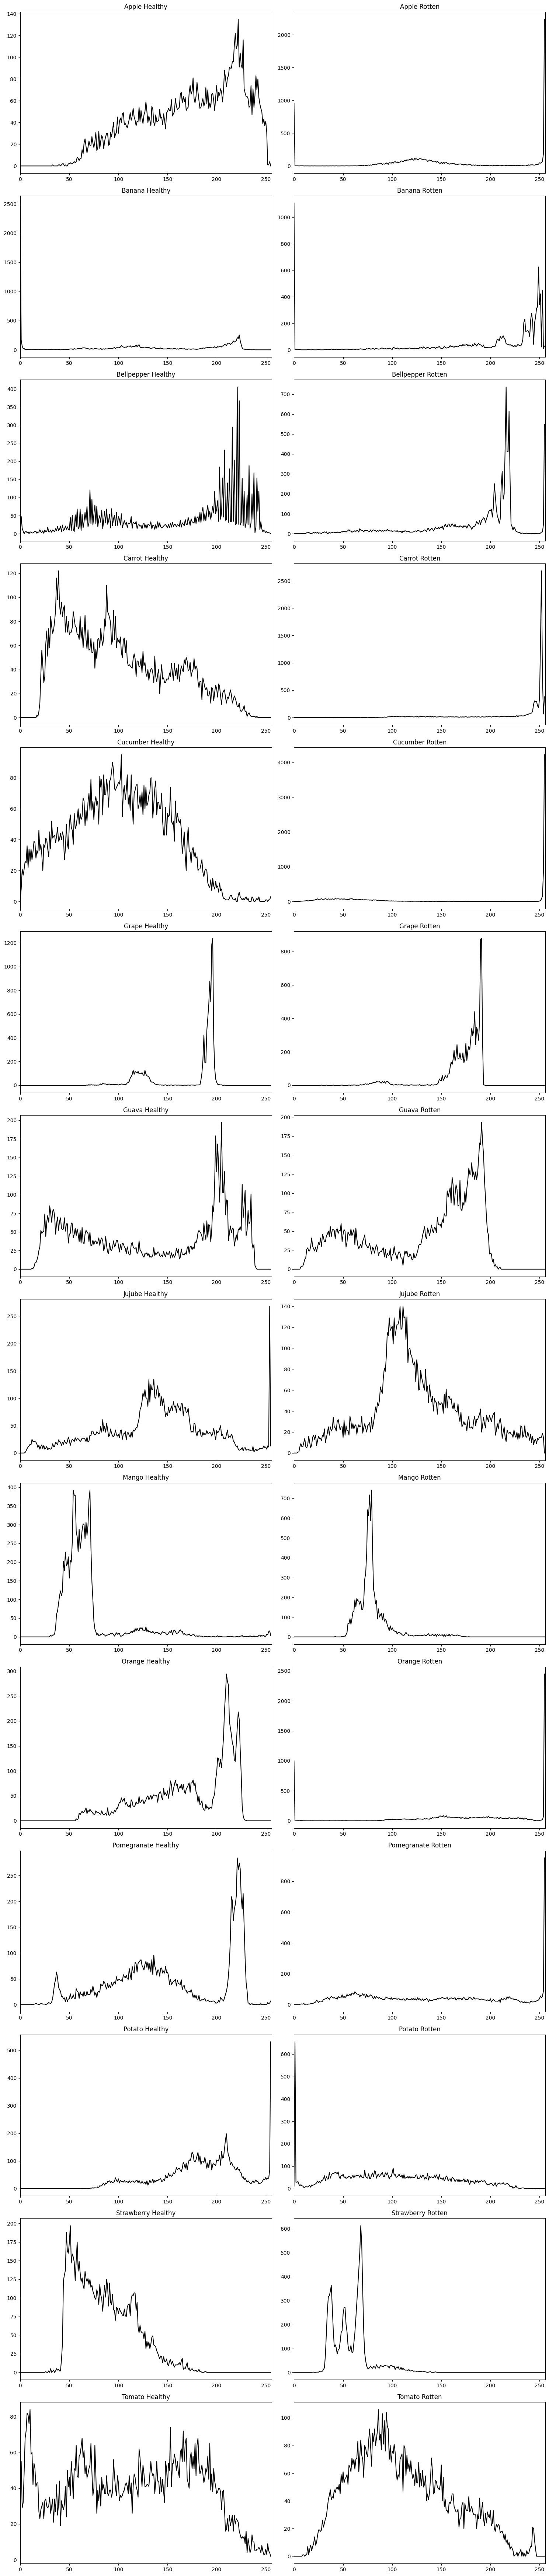

In [31]:
# Function to display the histogram of a grayscale image
def show_histogram(image, title, ax):
    histr = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.plot(histr, color='black')
    ax.set_xlim([0, 256])
    ax.set_title(title)

# Create a figure for the histograms
fig, axs = plt.subplots(14, 2, figsize=(15, 70))

# Display histograms for the fruits
row = 0
for fruit in ['Apple', 'Banana', 'Bellpepper', 'Carrot', 'Cucumber', 'Grape', 'Guava', 'Jujube', 'Mango', 'Orange', 'Pomegranate', 'Potato', 'Strawberry', 'Tomato']:
    show_histogram(images_bw[fruit + '__Healthy'][0], fruit + ' Healthy', axs[row, 0])
    show_histogram(images_bw[fruit + '__Rotten'][0], fruit + ' Rotten', axs[row, 1])
    row += 1

plt.tight_layout()
plt.show()